<div style="border:solid green 3px; padding: 20px">
																							
<b>Привет!</b>
																					
Меня зовут Сороколетов Илья и я буду проверять твой проект. 
																					
Предлагаю общаться на «**ты**», но если тебе будет комфортнее общаться на «**вы**», то сообщи об этом в комментариях)
																					
																					
Для твоего удобства, я буду выделять свои комментарии следующим образом:
																					
<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> Самые важные замечания. Они указывают на ключевые моменты, которые влияют на конечный результат проекта. </div>
																					
<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> Советы или замечания, которые помогут сделать твою работу лучше, но необязательны к выполнению.
																					
</div>
																					
<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> Так я выделяю все остальные комментарии.</div>
																					
																					
Пометками <b>v1-v2-v3-...</b> я буду отмечать версию проверки. Так ты сможешь быстро найти мои новые комментарии.
																					
Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения, например вот так:
																					    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
</div>
																					
<b>Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии.</b> Если ты оставляешь свои комментарии, то делай это под моими, чтобы сообщения были расположены в хронологическом порядке. Всё это поможет выполнить повторную проверку твоего проекта быстрее. 
																					
Перед отправкой работы я рекомендую нажимать Kernel -> Restart & Run All. Это перезапустит ядро и по очереди выполнит все ячейки. Так ты сможешь проверить, что всё работает корректно. Кнопка Kernel находится в панели сверху
																					
Обязательно задавай вопросы если они возникнут, а я перехожу к проверке)
																					
P.S. На всякий случай, я оставлю пустой шаблон для твоих комментариев ниже. Кликни два раза на мой комментарий, скопируй последние четыре строчки кода и вставляй их в пустую ячейку там, где ты хочешь оставить комментарий. Не забудь только перед этим сменить тип ячейки на Markdown. Быстро это можно сделать так: кликнуть на ячейку - нажать ESC - нажать M. 
																					    
																					    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Удали этот текст и вместо него напиши свой комментарий 🙂
</div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Молодец, что добавляешь краткое описание задачи. Это поможет тебе быстро вспомнить о чем проект, если спустя время ты решишь к нему вернуться)
</div>

### Откройте файл с данными и изучите общую информацию

Загрузим данные из csv-файла в датафрейм c помощью библиотеки pandas. В исходном csv-файле используется обратный слэш для разделения, поэтому в функцию .read_csv() добавляем аргумент sep= для корректного разделения столбцов в датафрейме.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')

In [3]:
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Все библиотеки лучше импортировать отдельно в первой ячейке. Это позволит тебе в любой момент добавить ещё одну библиотеку без перезаписи переменных.
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Для вывода таблиц лучше использовать функцию display
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Исправил по двум комментариям выше! Функцию print() на функцию display () заменил во всей тетради
</div>

 <div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v2:</b> 
<br>Обрати внимание, что часть столбцов заменилась на "...". Чтобы это исправить, нужно увеличить максимальное количество отображающихся столбцов командой
			
	pd.set_option('display.max_columns', None)
</div>

В рамках ознакомления с данными построим гистограмму для всех числовых столбцов таблицы. Используем метод .hist() и применяем его ко всему датафрейму data. На представленных ниже графиках мы видим несколько,например, гистограмма last_price или ceiling_height, где все значения собираются около нуля. Это нам может говорить о том, что некоторые значения столбцов сохранены в неправильных форматах или присутствуют выбросы или данные вовсе отсутствуют. Взглянем на данные в следующих главах.

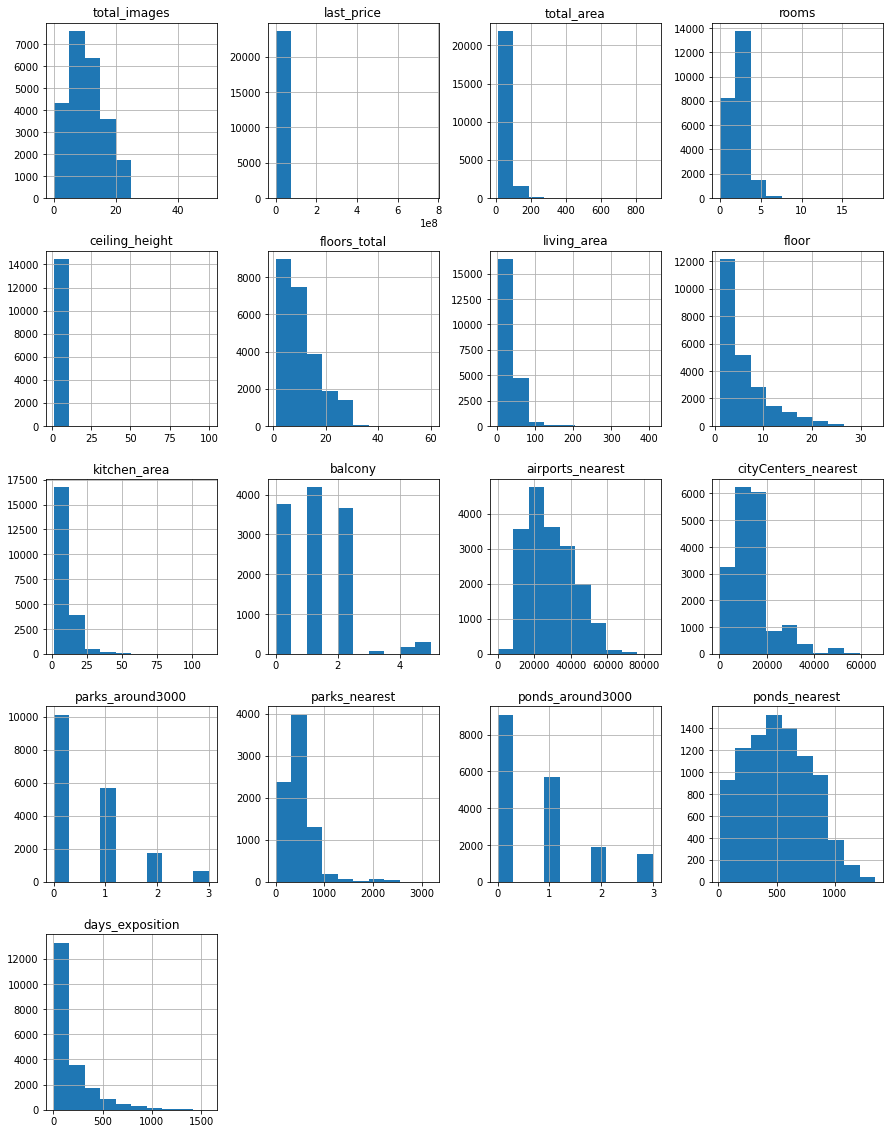

In [4]:
data.hist(figsize=(15, 20));

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Графики построено верно! 
</div>
															
<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Если после кода вызывающего график добавить ";", то мы избавимся от строчки над графиком)

	data.hist(figsize=(15, 20));
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Добавил точку с запятой. Спасибо за лайфхак :) 
</div>

### Выполните предобработку данных

Перейдем к предобработке данных. Найдём и изучим пропущенные значения в столбцах. Для этого используем комбинацию методов .isna().sum(). В выводе функции мы наблюдаем больше количество столбцов с пропусками. Пропуски не встречаются с первых пяти столбцах, в стобце floor и в столбцах studio и open_plan.

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Попробуем проанализировать столбцы с пропусками. Для тех пропусков, где замена возможна - проведем ее, где нет - оставим как есть.

К сожалению, для некоторых столбцов, таких как ceiling_height, floors_total и locality_name, замена имеющихся пропусков логическими значениями была бы некорректной из-за индивидуальных особенностей каждого объекта недвижимости. Вероятно, данные не были указаны продавцами при размещении объявлений, либо возникли проблемы при сборе и обработке данных.

Для столбцов living_area и kitchen_area также необходимо запросить информацию у лица, разместившего объявление, так как эти параметры могли быть просто пропущены из-за невнимательности.

Пропуски в столбце days_exposition, вероятно, могут быть вызваны техническими проблемами, так как время создания и снятия объявлений обычно фиксируется платформой. Эти пропуски также оставляются без изменений, поскольку каждое объявление уникально, и невозможно выявить закономерности для их заполнения.

Огромное количество пропусков в колонках airports_nearest, cityCenters_nearest, parks_nearest и ponds_nearest может свидетельствовать о проблемах с функционированием геосервиса или технических проблемах при сборе данных.

В обычных условиях, платформа должна автоматически заполнять эти поля на основе данных о местоположении объекта недвижимости. Однако, если вы обнаруживаете большое количество пропусков в этих колонках, возможно, есть проблемы с обработкой геоданных или их доступностью.

Заполнение этих данных вручную для каждого предложения может быть крайне трудоемким процессом, учитывая необходимость изучения каждого объявления отдельно.

Пропуски в столбцах is_apartment, balcony, parks_around3000 и ponds_around3000 могут быть интерпретированы как отсутствие определенных характеристик (например, отсутствие балкона или парков в ближайшем окружении). Заменим их на значение 0 с помощью цикла и метода .fillna(), аргументом которого будет 0.

In [6]:
columns_to_replace = ['is_apartment', 'balcony', 'parks_around3000', 'ponds_around3000']
for column in columns_to_replace:
    data[column] = data[column].fillna(0)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>👌
</div>

Проверим устранил ли этот методы пропсуки в заявленных столбцах. Для этого используем все ту же комбинацию методов .isna().sum(). 

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

В следующей части исследования мы будем работать с типами данных. Попробуем рассмотреть типы данных в столбцах и найти столбцы, в которых нужно изменить тип данных. Для этого вызовем метод .info()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В следующих столбцах необходимо поменять тип данных:

- first_day_exposition: данные сохранены в формате object, хотя они представляют собой дату и время. Переведем их в формат datetime64.
- is_apartment: эти данные представляют собой булевые значения, поэтому должны быть сохранены в датафрейме в формате bool.
- balcony, floors_total, parks_around3000, ponds_around3000, days_exposition: эти столбцы указывают на количество чего-то (балконов, этажей и т. д.). Количество не может быть записано в float64, поменяем его на формат int64

Начнем с столбца first_day_exposition. Для этого используем метод .to_datetime()

In [9]:
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S'
)
display(data.info()) #проверяем формат столбца first_day_exposition

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

None

Продолжим столбцом is_apartment. Для этого используем метод .astype()

In [10]:
data['is_apartment'] = data['is_apartment'].astype('bool')
display(data.info()) #проверяем формат столбца is_apartment

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

None

Перейдем к столбцам balcony, floors_total, parks_around3000, ponds_around3000, days_exposition, где при помощи того же метода .astype() поменяем значения с float64 на int64

In [11]:
columns_to_right_format = ['balcony', 'parks_around3000', 'ponds_around3000']
for column in columns_to_right_format:
    data[column] = data[column].astype('int')

In [12]:
display(data.info()) #проверяем формат столбцов

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

None

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Изменение типов данных проведено верно. Можно ещё заменить тип данных с float64 на float32 для экономии памяти.
</div>

Выведем первые 20 строк датафрейма и посмотрим, какие изменения мы провели:

In [13]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,False,...,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,False,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,False,...,9.10,0,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,False,...,14.40,1,посёлок Парголово,52996.0,19143.0,0,NaN,0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,False,...,18.90,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,False,...,8.81,0,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,6.50,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289.0


Изучим уникальные значения в столбце с названиями (locality_name) и устраним неявные дубликаты. Для этого используем метод .unique()

In [14]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [15]:
data['locality_name'].nunique()

364

При помощи метода .replace() заменим неявные дубликаты.

In [16]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace('поселок Мурино', 'Мурино', regex=True)
    .replace('Деревня Кудрово', 'Кудрово', regex=True)
    .replace ('Никольское', 'село Никольское', regex=True)
    .replace ('городской поселок', 'поселок городского типа', regex=True)
    .replace ('поселок станции', 'поселок при железнодорожной станции',regex=True)
)

Проверяем уникальные значения при помощи метода .unique() и .nunique()

In [17]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары',
       'поселок городского типа Янино-1', 'поселок Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'деревня Кудрово',
       'Коммунар', 'Колпино', 'поселок городского типа Красный Бор',
       'Гатчина', 'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет',

In [18]:
data['locality_name'].nunique()

320

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Супер! Здесь всё верно)
</div>

### Добавьте в таблицу новые столбцы

Добавим в датафрейм следующие столбцы:
- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры («первый», «последний», «другой»);
- расстояние до центра города в километрах.

Начнем с цены за один квадратный метр. Вводим новый столбец под названием price_sqr_meter. Для его получения делим стоимость объекта на его площадь и округляемдо двух знаков после запятой.

In [19]:
data['price_sqr_meter'] = round((data['last_price'] / data['total_area']),2)

In [20]:
display(data.head(20)) # проверяем правильно ли сработал расчет для нового столбца price_sqr_meter

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqr_meter
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,False,...,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.10
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,False,...,0,поселок городского типа Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,95065.79
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,False,...,1,поселок Парголово,52996.0,19143.0,0,NaN,0,NaN,155.0,99195.71
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,False,...,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN,110544.69
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,False,...,0,Мурино,NaN,NaN,0,NaN,0,NaN,189.0,87454.76
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289.0,88524.59


Добавим идентификатор дня публикации: понедельник - 0, вторник - 1 и так далее. Назовем новый столбец weekday и используем метод dt.weekday для идентификатора дня недели:

In [21]:
data['weekday'] = data['first_day_exposition'].dt.weekday

In [22]:
display(data.head(20)) # проверяем правильно ли сработал метод для нового столбца weekday

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqr_meter,weekday
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37,3
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,False,...,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79,1
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,False,...,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71,3
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.10,4
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00,1
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,False,...,поселок городского типа Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,95065.79,0
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,False,...,поселок Парголово,52996.0,19143.0,0,NaN,0,NaN,155.0,99195.71,3
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,False,...,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN,110544.69,3
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,False,...,Мурино,NaN,NaN,0,NaN,0,NaN,189.0,87454.76,2
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289.0,88524.59,6


Добавим столбец с названием месяца - month. Извлечем название месяца из столбца first_day_exposition для этого нужно поместить время в класс DatetimeIndex и применить к нему атрибут month.

In [23]:
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month

In [24]:
display(data.head(20)) # проверяем правильно ли сработал метод для нового столбца month

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqr_meter,weekday,month
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37,3,3
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,False,...,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79,1,12
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,False,...,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71,3,8
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.10,4,7
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00,1,6
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,False,...,NaN,NaN,0,NaN,0,NaN,55.0,95065.79,0,9
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,False,...,52996.0,19143.0,0,NaN,0,NaN,155.0,99195.71,3,11
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,False,...,23982.0,11634.0,0,NaN,0,NaN,NaN,110544.69,3,4
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,False,...,NaN,NaN,0,NaN,0,NaN,189.0,87454.76,2,5
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,50898.0,15008.0,0,NaN,0,NaN,289.0,88524.59,6,2


Добавим столбец с годом - year. Извлечем название месяца из столбца first_day_exposition для этого нужно поместить время в класс DatetimeIndex и применить к нему атрибут year.

In [25]:
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [26]:
display(data.head(20)) # проверяем правильно ли сработал метод для нового столбца year

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqr_meter,weekday,month,year
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,16028.0,1,482.0,2,755.0,NaN,120370.37,3,3,2019
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,False,...,18603.0,0,NaN,0,NaN,81.0,82920.79,1,12,2018
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,False,...,13933.0,1,90.0,2,574.0,558.0,92785.71,3,8,2015
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,6800.0,2,84.0,3,234.0,424.0,408176.10,4,7,2015
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,8098.0,2,112.0,1,48.0,121.0,100000.00,1,6,2018
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,False,...,NaN,0,NaN,0,NaN,55.0,95065.79,0,9,2018
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,False,...,19143.0,0,NaN,0,NaN,155.0,99195.71,3,11,2017
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,False,...,11634.0,0,NaN,0,NaN,NaN,110544.69,3,4,2019
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,False,...,NaN,0,NaN,0,NaN,189.0,87454.76,2,5,2018
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,15008.0,0,NaN,0,NaN,289.0,88524.59,6,2,2017


Введем еще один новый столбец датафрейма - floor_type, который будет включать в себя три категории - "первый","последний","другой". Для этого создадим новую функцию def, которая будет включать в себя условную конструкцию

In [27]:
def floor_type_maker(row):
    flat_floor = row['floor']
    total_floors = row['floors_total']
    
    if flat_floor == 1:
        return 'первый'
    if flat_floor == total_floors:
        return 'последний'
    return 'другой'

data['floor_type'] = data.apply(floor_type_maker, axis=1)

In [28]:
display(data.head(20)) # проверяем правильно ли сработал метод для нового столбца floor_type

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqr_meter,weekday,month,year,floor_type
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,1,482.0,2,755.0,NaN,120370.37,3,3,2019,другой
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,False,...,0,NaN,0,NaN,81.0,82920.79,1,12,2018,первый
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,False,...,1,90.0,2,574.0,558.0,92785.71,3,8,2015,другой
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,2,84.0,3,234.0,424.0,408176.10,4,7,2015,другой
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,2,112.0,1,48.0,121.0,100000.00,1,6,2018,другой
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,False,...,0,NaN,0,NaN,55.0,95065.79,0,9,2018,другой
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,False,...,0,NaN,0,NaN,155.0,99195.71,3,11,2017,другой
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,False,...,0,NaN,0,NaN,NaN,110544.69,3,4,2019,другой
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,False,...,0,NaN,0,NaN,189.0,87454.76,2,5,2018,другой
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,0,NaN,0,NaN,289.0,88524.59,6,2,2017,другой


Создадим последний новый столбец датафрейма - cityCenters_nearest_meters, который переводит расстояние до центра из столбца cityCenters_nearest из метров в километры. Для этого все значения из столбца cityCenters_nearest поделим на 1000 и округлим до ближайших целых значений.

In [29]:
data['cityCenters_nearest_meters'] = round(data['cityCenters_nearest']/1000)

In [30]:
display(data.head(20)) # проверяем правильно ли сработал метод для нового столбца cityCenters_nearest_meters

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqr_meter,weekday,month,year,floor_type,cityCenters_nearest_meters
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,482.0,2,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,False,...,NaN,0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,False,...,90.0,2,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,84.0,3,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,112.0,1,48.0,121.0,100000.00,1,6,2018,другой,8.0
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,False,...,NaN,0,NaN,55.0,95065.79,0,9,2018,другой,NaN
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,False,...,NaN,0,NaN,155.0,99195.71,3,11,2017,другой,19.0
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,False,...,NaN,0,NaN,NaN,110544.69,3,4,2019,другой,12.0
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,False,...,NaN,0,NaN,189.0,87454.76,2,5,2018,другой,NaN
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,NaN,0,NaN,289.0,88524.59,6,2,2017,другой,15.0


### Проведите исследовательский анализ данных

Построим отдельные гистограммы для каждого из параметров ниже:

- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего парка

В некоторых параметрах встречаются редкие и выбивающиеся значения. Попробуем объяснить их. В случае, если это ошибка, попробуем обработать их, восстановив корректное значение. Если причину найти не получится, то просто удалим строки из датафрейма с редкими или выбивающиемя значниеями.

Начнем с параметра общая площадь. Построим гистограмму с помощью метода .hist().

<AxesSubplot:>

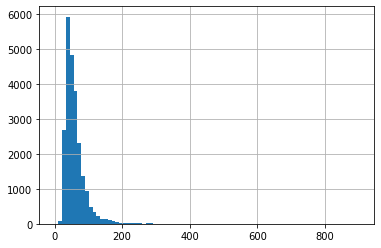

In [31]:
data['total_area'].hist(bins=80,range=(0,900))

Гистограмма по оси X имеет дапазон от минимального (12) до максимального (900). По оси Y - от 0 до 6000. Среднее значение равно примерно 60, поэтому гистограмма сосредоточена вокруг этого значения. Однако, так как максимальное значение составляет 900,  мы наблюдаем некоторое количество значений, которые отклоняться от среднего и представлены как длинный "хвост" на графике.

In [32]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Среднее значение и медиана близки друг к другу, что может указывать на отсутствие значительных выбросов. Однако, посмотрев на максимальное и минимальное значения можно смело утверждать, что в данных выбросы есть. Посмотрим на небольшие квартиры в Санкт-Петербурге (большинство из них находится там)

In [33]:
data.query('total_area < 20 and locality_name == "Санкт-Петербург"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqr_meter,weekday,month,year,floor_type,cityCenters_nearest_meters
4542,12,3300000.0,18.00,2018-11-07,1,3.50,5.0,9.00,2,False,...,349.0,1,963.0,9.0,183333.33,2,11,2018,другой,5.0
8454,7,2250000.0,19.00,2019-03-12,0,3.00,6.0,NaN,2,False,...,238.0,3,374.0,44.0,118421.05,1,3,2019,другой,7.0
8755,1,1350000.0,18.80,2017-11-22,0,2.75,19.0,15.80,1,False,...,NaN,1,1127.0,128.0,71808.51,2,11,2017,первый,14.0
8886,10,2450000.0,15.50,2018-08-22,0,NaN,5.0,10.00,2,False,...,NaN,1,446.0,27.0,158064.52,2,8,2018,другой,5.0
9157,0,3400000.0,17.60,2018-03-18,1,NaN,5.0,15.00,2,False,...,336.0,1,309.0,117.0,193181.82,6,3,2018,другой,2.0
9412,5,2100000.0,16.00,2017-12-10,0,NaN,6.0,13.00,1,False,...,228.0,3,72.0,3.0,131250.00,6,12,2017,первый,2.0
9817,8,2190000.0,19.00,2018-10-12,0,3.50,5.0,15.00,1,False,...,383.0,1,781.0,89.0,115263.16,4,10,2018,первый,8.0
10208,3,1900000.0,17.00,2018-08-14,1,2.75,4.0,13.00,2,False,...,NaN,0,NaN,7.0,111764.71,1,8,2018,другой,6.0
12996,8,1900000.0,18.00,2019-01-25,0,2.60,5.0,16.00,3,False,...,149.0,2,496.0,10.0,105555.56,4,1,2019,другой,16.0
16949,9,1550000.0,15.00,2018-08-21,1,2.70,9.0,NaN,1,False,...,NaN,1,1079.0,42.0,103333.33,1,8,2018,первый,16.0


Наверное, речь идет о комнатах в коммунальных квартирах. Оставим эти данные, так как они являются вполне релевантными.

Посмотрим на большие квавртиры (больше 250 квадратных метров), также добавим условие, что жилая площадь квартир в два раза меньше ее общей площади.

In [34]:
data.query('total_area > 250 and total_area > 2*living_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqr_meter,weekday,month,year,floor_type,cityCenters_nearest_meters
4536,25,26000000.0,290.0,2017-11-16,5,2.80,17.0,141.00,16,False,...,NaN,1,153.0,120.0,89655.17,3,11,2017,другой,6.0
6621,20,99000000.0,488.0,2017-04-09,5,2.95,20.0,216.00,17,False,...,646.0,1,368.0,351.0,202868.85,6,4,2017,другой,5.0
7674,20,131000000.0,380.0,2016-09-23,5,3.90,6.0,150.00,4,False,...,161.0,1,635.0,901.0,344736.84,4,9,2016,другой,5.0
8822,14,49968900.0,398.0,2017-07-12,9,3.00,2.0,160.10,1,False,...,471.0,2,440.0,471.0,125550.00,2,7,2017,первый,17.0
8900,13,190870000.0,268.0,2016-03-25,3,NaN,8.0,132.00,7,False,...,NaN,2,198.0,901.0,712201.49,4,3,2016,другой,5.0
9433,20,46000000.0,260.0,2015-01-22,3,2.80,18.0,74.00,18,False,...,NaN,1,213.0,NaN,176923.08,3,1,2015,последний,8.0
9561,2,24900000.0,312.0,2015-11-27,5,3.00,2.0,127.00,2,False,...,287.0,1,203.0,392.0,79807.69,4,11,2015,последний,12.0
10569,13,36900000.0,347.5,2017-09-14,8,NaN,4.0,160.00,1,False,...,1809.0,2,241.0,249.0,106187.05,3,9,2017,первый,34.0
11319,3,26450000.0,284.0,2018-02-01,4,NaN,6.0,130.30,5,False,...,NaN,0,NaN,145.0,93133.80,3,2,2018,другой,4.0
13139,20,55000000.0,288.0,2017-11-14,5,3.51,6.0,100.70,2,False,...,175.0,1,682.0,338.0,190972.22,1,11,2017,другой,5.0


Эти квартиры выглядят неправдоподобно, поэтому удалим их из датафрейма. 

In [35]:
data = data.query('not(total_area > 250 and total_area > 2*living_area)')

In [36]:
data['total_area'].describe()

count    23677.000000
mean        60.068948
std         34.182696
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        631.200000
Name: total_area, dtype: float64

Взглянем на очень крупные квартиры, чья площадь больше 400 квадратных метров.

In [37]:
data.query('total_area > 400')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqr_meter,weekday,month,year,floor_type,cityCenters_nearest_meters
660,3,49950000.0,483.90,2017-10-04,7,3.20,6.0,312.5,4,False,...,461.0,3,22.0,391.0,103223.81,2,10,2017,другой,1.0
3117,19,140000000.0,631.00,2019-03-30,7,NaN,5.0,NaN,5,False,...,NaN,2,210.0,NaN,221870.05,5,3,2019,последний,5.0
3676,12,28789000.0,441.98,2019-01-23,4,NaN,6.0,NaN,6,False,...,NaN,0,NaN,NaN,65136.43,2,1,2019,последний,5.0
4237,1,50000000.0,517.00,2017-10-14,7,NaN,4.0,332.0,3,False,...,477.0,2,540.0,NaN,96711.80,5,10,2017,другой,2.0
5358,20,65000000.0,590.00,2019-02-14,15,3.50,6.0,409.0,3,False,...,767.0,0,NaN,14.0,110169.49,3,2,2019,другой,5.0
5893,3,230000000.0,500.00,2017-05-31,6,NaN,7.0,NaN,7,False,...,NaN,2,198.0,50.0,460000.00,2,5,2017,последний,5.0
6221,8,34000000.0,470.30,2018-01-14,4,NaN,3.0,248.7,3,False,...,852.0,3,122.0,179.0,72294.28,6,1,2018,последний,15.0
8018,20,84000000.0,507.00,2015-12-17,5,4.45,7.0,301.5,7,True,...,110.0,0,NaN,1078.0,165680.47,3,12,2015,последний,6.0
9826,1,43185328.0,494.10,2017-05-12,1,2.85,12.0,NaN,3,False,...,592.0,0,NaN,5.0,87402.00,4,5,2017,другой,7.0
12401,20,91500000.0,495.00,2017-06-19,7,4.65,7.0,347.5,7,False,...,110.0,0,NaN,14.0,184848.48,0,6,2017,последний,6.0


Квартиры с такой площадью можно объяснить на первом этаже и последнем. В первом случае может идти речь о комерческих помещениях, а во втором о пентхаусах. Однако слонжо объяснить квартиры с такой площадью на других этажах. Есть подозрение, что эти значения являются вбросом, поэтому удалим их.

In [38]:
data = data.query('not(total_area > 400 and floor_type == "другой")')

In [39]:
data['total_area'].describe()

count    23670.000000
mean        59.945597
std         33.410470
min         12.000000
25%         40.000000
50%         52.000000
75%         69.677500
max        631.200000
Name: total_area, dtype: float64

Построим гистограмму для жилой площади с помощью метода .hist().

<AxesSubplot:>

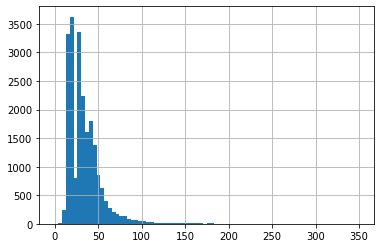

In [40]:
data['living_area'].hist(bins=80,range=(0,350))

Гистограмма по оси X имеет дапазон от минимального (2) до максимального (347.5). По оси Y - от 0 до 5500. Среднее значение равно примерно 34 и мы видим, что гистограмма сосредоточена вокруг этого значения, однако наблюдается еще один пик между 15 и 20. Также максимальное значение составляет 347.5,  мы наблюдаем некоторое количество значений, которые отклоняться от среднего и представлены как длинный "хвост" на графике.

In [41]:
data['living_area'].describe()

count    21769.000000
mean        34.281985
std         21.201813
min          2.000000
25%         18.600000
50%         30.000000
75%         42.200000
max        347.500000
Name: living_area, dtype: float64

Медиана и 25-й процентиль близки друг к другу, что указывает на то, что большинство данных сосредоточены в этом диапазоне. 75% данных находятся ниже 42 квадратных метров, это видно и на гистограмме.

Обработав значения в столбце общей площади мы устранили выбросы и для площади жилой. Поэтому здесь оставим все, как есть

Построим гистограмму для площади кухни с помощью метода .hist().

<AxesSubplot:>

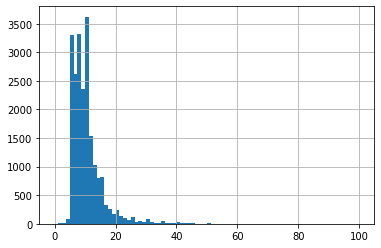

In [42]:
data['kitchen_area'].hist(bins=80,range=(0,100))

Гистограмма по оси X имеет дапазон от минимального (1,3) до максимального (107). По оси Y - от 0 до 3600. Среднее значение равно примерно 10,5 и мы видим, что гистограмма сосредоточена вокруг этого значения, однако наблюдается еще два пика - 6 и 8. Также максимальное значение составляет 107,  мы наблюдаем некоторое количество значений, которые отклоняться от среднего и представлены как длинный "хвост" на графике.

In [43]:
data['kitchen_area'].describe()

count    21395.000000
mean        10.533895
std          5.758442
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

Разброс данных относительно среднего значения не слишком велик, что указывает на то, что значения переменной распределены достаточно компактно вокруг среднего. Это подтверждается тем, что разница между 75-м и 25-м процентилями не слишком большая, что также указывает на относительно узкий размах данных

Присутсвтуют и большие значения. Однако их мы описали еще в столбце с общей площадью - эти данные можно оставить.

Построим гистограмму для цены объекта с помощью метода .hist().

In [44]:
data['last_price'] = data['last_price']/1000000 # для простоты розделим цену на 1 млн

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Можно сразу делить на 1 млн)
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Согласен
</div>

<AxesSubplot:>

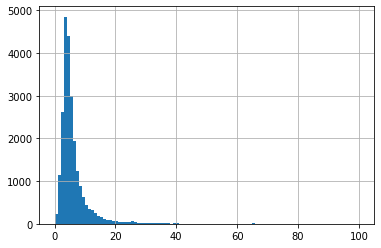

In [45]:
data['last_price'].hist(bins=100, range=(0,100))

Гистограмма по оси X имеет дапазон от минимального (0.012190) до максимального (763). По оси Y - от 0 до 5000. Среднее значение равно примерно 6,45 и мы видим, что гистограмма сосредоточена вокруг этого значения. Также максимальное значение составляет 763,  мы наблюдаем некоторое количество значений, которые отклоняться от среднего и представлены как длинный "хвост" на графике.

In [46]:
data['last_price'].describe()

count    23670.000000
mean         6.450882
std         10.135198
min          0.012190
25%          3.400000
50%          4.642000
75%          6.759425
max        763.000000
Name: last_price, dtype: float64

Средняя цена недвижимости составляет примерно 6.54 миллионов. Медиана - 4.65 миллиона. Стандартное отклонение - 10.89 миллионов - указывает на большой разброс цен. 75% наблюдений имеют цену, меньшую или равную 6,8 миллионов. Все указыавет на большой разброс цен, что нормально для рынка недвижимости, где представленны разные варинты объектов. Взглянем на квартиру, чья цена составляет 763 миллиона.

In [47]:
data.query('last_price == 763')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqr_meter,weekday,month,year,floor_type,cityCenters_nearest_meters
12971,19,763.0,400.0,2017-09-30,7,NaN,10.0,250.0,10,False,...,530.0,3,756.0,33.0,1907500.0,5,9,2017,последний,4.0


Когда сравним сопоставимые по площади квартиры, то видим, что средним значением является 93 млн. Строчка 12971 является явным выбросом. Удалим ее.

In [48]:
data.query('living_area == 250')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqr_meter,weekday,month,year,floor_type,cityCenters_nearest_meters
793,20,135.0,310.0,2018-05-22,4,3.3,5.0,250.0,2,False,...,295.0,3,190.0,342.0,435483.87,1,5,2018,другой,7.0
1494,10,65.0,364.0,2018-11-27,7,3.9,6.0,250.0,3,False,...,NaN,1,689.0,46.0,178571.43,1,11,2018,другой,3.0
12971,19,763.0,400.0,2017-09-30,7,NaN,10.0,250.0,10,False,...,530.0,3,756.0,33.0,1907500.00,5,9,2017,последний,4.0
15151,15,88.0,400.0,2019-03-27,9,2.5,2.0,250.0,1,False,...,315.0,1,578.0,NaN,220000.00,2,3,2019,первый,3.0
15701,12,83.0,293.6,2017-11-10,4,NaN,9.0,250.0,7,False,...,164.0,0,NaN,NaN,282697.55,4,11,2017,другой,6.0


In [49]:
data = data.query('not(last_price == 763)')

In [50]:
data['last_price'].describe()

count    23669.000000
mean         6.418918
std          8.862416
min          0.012190
25%          3.400000
50%          4.640000
75%          6.757702
max        401.300000
Name: last_price, dtype: float64

Посмотрим на другие крупные значения в столбце last_price > 150

In [51]:
data.query('last_price > 150')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqr_meter,weekday,month,year,floor_type,cityCenters_nearest_meters
1026,20,155.0000,310.0,2018-10-12,5,5.30,3.0,190.0,3,False,...,NaN,1,603.0,NaN,500000.00,4,10,2018,последний,5.0
1436,19,330.0000,190.0,2018-04-04,3,3.50,7.0,95.0,5,False,...,519.0,3,285.0,233.0,1736842.11,2,4,2018,другой,1.0
2536,16,159.9840,242.4,2015-08-27,4,3.85,9.0,131.0,7,False,...,679.0,1,227.0,501.0,660000.00,3,8,2015,другой,2.0
5893,3,230.0000,500.0,2017-05-31,6,NaN,7.0,NaN,7,False,...,NaN,2,198.0,50.0,460000.00,2,5,2017,последний,5.0
13749,7,240.0000,410.0,2017-04-01,6,3.40,7.0,218.0,7,False,...,NaN,2,198.0,199.0,585365.85,5,4,2017,последний,5.0
14706,15,401.3000,401.0,2016-02-20,5,NaN,9.0,204.0,9,False,...,545.0,1,478.0,393.0,1000748.13,5,2,2016,последний,2.0
16461,17,245.0000,285.7,2017-04-10,6,3.35,7.0,182.8,4,False,...,400.0,3,140.0,249.0,857542.88,0,4,2017,другой,6.0
16495,12,159.0000,260.0,2017-04-04,4,NaN,5.0,180.0,4,False,...,138.0,3,620.0,178.0,611538.46,1,4,2017,другой,0.0
19155,20,160.0000,243.0,2018-11-12,5,NaN,5.0,145.0,4,False,...,285.0,1,200.0,18.0,658436.21,0,11,2018,другой,1.0
19865,20,180.0000,347.0,2015-01-21,8,3.90,6.0,260.0,3,False,...,537.0,3,501.0,834.0,518731.99,2,1,2015,другой,4.0


Вызыают вопросы строки с инлексом 1436, 14706, 16461, 22831. Цена явно не сопоставима площади квартиры. Также я бы удалил строку с индексом 19540 из датафрейма по причине того, что это число сильно выбивается из датафрейма.

In [52]:
data = data.query('last_price != 330 and last_price != 401.3 and last_price != 245 and last_price != 289.2384 and last_price != 420 and last_price != 300 and last_price != 230 and last_price != 240 and last_price != 190.87')

In [53]:
data['last_price'].describe()

count    23663.000000
mean         6.347202
std          7.572176
min          0.012190
25%          3.400000
50%          4.635000
75%          6.750000
max        180.000000
Name: last_price, dtype: float64

In [54]:
data.query('last_price > 150')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqr_meter,weekday,month,year,floor_type,cityCenters_nearest_meters
1026,20,155.000,310.0,2018-10-12,5,5.30,3.0,190.0,3,False,...,NaN,1,603.0,NaN,500000.00,4,10,2018,последний,5.0
2536,16,159.984,242.4,2015-08-27,4,3.85,9.0,131.0,7,False,...,679.0,1,227.0,501.0,660000.00,3,8,2015,другой,2.0
16495,12,159.000,260.0,2017-04-04,4,NaN,5.0,180.0,4,False,...,138.0,3,620.0,178.0,611538.46,1,4,2017,другой,0.0
19155,20,160.000,243.0,2018-11-12,5,NaN,5.0,145.0,4,False,...,285.0,1,200.0,18.0,658436.21,0,11,2018,другой,1.0
19865,20,180.000,347.0,2015-01-21,8,3.90,6.0,260.0,3,False,...,537.0,3,501.0,834.0,518731.99,2,1,2015,другой,4.0


Взглянем на малые значения 

In [55]:
data.query('last_price < 0.5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqr_meter,weekday,month,year,floor_type,cityCenters_nearest_meters
5698,7,0.45000,42.0,2017-07-31,2,NaN,1.0,23.0,1,False,...,NaN,0,NaN,233.0,10714.29,0,7,2017,первый,NaN
6859,6,0.49000,40.0,2017-12-11,1,NaN,5.0,NaN,3,False,...,NaN,0,NaN,43.0,12250.00,0,12,2017,другой,NaN
8793,7,0.01219,109.0,2019-03-20,2,2.75,25.0,32.0,25,False,...,805.0,0,NaN,8.0,111.83,2,3,2019,последний,9.0
9581,7,0.45000,43.4,2018-08-31,2,NaN,5.0,30.3,3,False,...,NaN,0,NaN,96.0,10368.66,4,8,2018,другой,NaN
10782,3,0.49000,29.1,2016-05-05,1,2.50,5.0,17.0,5,False,...,NaN,0,NaN,719.0,16838.49,3,5,2016,последний,NaN
14911,5,0.43000,54.0,2018-06-26,2,NaN,3.0,NaN,3,False,...,NaN,0,NaN,44.0,7962.96,1,6,2018,последний,NaN
16032,8,0.48000,32.0,2019-01-06,1,NaN,2.0,16.0,1,False,...,NaN,0,NaN,83.0,15000.00,6,1,2019,первый,NaN
16219,14,0.45000,38.5,2018-07-11,2,2.65,2.0,NaN,1,False,...,NaN,0,NaN,45.0,11688.31,2,7,2018,первый,NaN
16274,18,0.44000,40.0,2018-07-10,1,NaN,5.0,NaN,1,False,...,NaN,0,NaN,45.0,11000.00,1,7,2018,первый,NaN
17456,7,0.43000,30.4,2019-04-22,1,NaN,2.0,16.0,1,False,...,NaN,0,NaN,NaN,14144.74,0,4,2019,первый,NaN


Выбивается значение 12190 рублей за квартиру 109 квадратных метров. Выглядит подозрительно. Удалим эту строку.

In [56]:
data = data.query('last_price != 0.01219')

In [57]:
data['last_price'].describe()

count    23662.000000
mean         6.347470
std          7.572224
min          0.430000
25%          3.400000
50%          4.635500
75%          6.750000
max        180.000000
Name: last_price, dtype: float64

Проведенными манипуляцими мы снизили значения стандартного отклоения на 3 млни рублей и приблизили среднеей занчения медианному, оставив большинство строк в датафрейма, удалив те, которые сильно выбивались из датафрейма и вызывали подозрение

Построим гистограмму для количества комнат с помощью метода .hist().

<AxesSubplot:>

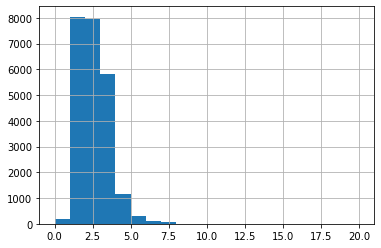

In [58]:
data['rooms'].hist(bins=20,range=(0,20))

Так как количество комнат в датафрейме записано в формате int64, на гистограмме видим несколько пиков 1 и 2 комантные кавртиры.

In [59]:
data['rooms'].describe()

count    23662.000000
mean         2.065083
std          1.065097
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Вызыают подозрение квавртиры с 0 комнат. Такого быть не может. Вероятнее всего продавец забыл обозначить количество комнат в квартире.

In [60]:
data.query('rooms == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqr_meter,weekday,month,year,floor_type,cityCenters_nearest_meters
144,1,2.450,27.00,2017-03-30,0,NaN,24.0,15.50,2,False,...,NaN,0,NaN,181.0,90740.74,3,3,2017,другой,NaN
349,4,2.320,25.00,2017-09-27,0,NaN,14.0,17.00,1,False,...,NaN,0,NaN,45.0,92800.00,2,9,2017,первый,NaN
440,8,2.480,27.11,2018-03-12,0,NaN,17.0,24.75,4,False,...,NaN,2,982.0,64.0,91479.16,0,3,2018,другой,15.0
508,0,3.375,34.40,2017-03-28,0,NaN,26.0,24.30,19,False,...,NaN,1,593.0,430.0,98110.47,1,3,2017,другой,19.0
608,2,1.850,25.00,2019-02-20,0,NaN,10.0,NaN,7,False,...,NaN,0,NaN,29.0,74000.00,2,2,2019,другой,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3.200,26.00,2017-09-01,0,NaN,25.0,18.00,16,False,...,NaN,1,623.0,14.0,123076.92,4,9,2017,другой,13.0
23442,0,2.500,27.70,2017-09-28,0,NaN,24.0,18.00,4,False,...,NaN,0,NaN,4.0,90252.71,3,9,2017,другой,NaN
23554,15,3.350,26.00,2018-09-07,0,NaN,19.0,NaN,8,False,...,NaN,2,112.0,31.0,128846.15,4,9,2018,другой,17.0
23592,10,1.450,29.00,2017-11-11,0,NaN,9.0,18.00,8,False,...,NaN,0,NaN,82.0,50000.00,5,11,2017,другой,NaN


Удалим эти строчки из датафрейма.

In [61]:
data = data.query('rooms != 0')

In [62]:
data['rooms'].describe()

count    23465.000000
mean         2.082421
std          1.052545
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Также настораживает квартиры с большим количеством комнат. Взглянем на них.

In [63]:
data.query('rooms > 10')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqr_meter,weekday,month,year,floor_type,cityCenters_nearest_meters
648,3,17.500,183.7,2018-07-01,11,3.40,7.0,138.8,7,False,...,NaN,0,NaN,NaN,95264.02,6,7,2018,последний,3.0
866,5,25.000,363.0,2017-12-23,14,3.16,5.0,222.0,4,False,...,NaN,2,435.0,418.0,68870.52,5,12,2017,другой,8.0
9688,8,33.000,194.1,2017-02-07,11,3.43,5.0,129.0,2,False,...,686.0,2,66.0,813.0,170015.46,1,2,2017,другой,1.0
14498,6,32.250,374.6,2018-06-09,19,NaN,5.0,264.5,2,False,...,NaN,2,548.0,114.0,86091.83,5,6,2018,другой,4.0
18848,6,28.500,270.0,2015-03-02,16,3.00,4.0,180.0,4,False,...,516.0,0,NaN,1365.0,105555.56,0,3,2015,последний,4.0
20829,6,28.659,245.4,2016-03-31,14,NaN,4.0,168.3,2,False,...,541.0,2,118.0,95.0,116784.84,3,3,2016,другой,2.0


В квартирах, чья жилая площадь меньше 200 квадртных метров, вряд ли сможет быть 10 и больше комнат. Удалим эти строчки из датафрейма.

In [64]:
data = data.query('not (rooms > 10) and living_area < 200')

In [65]:
data['rooms'].describe()

count    21553.000000
mean         2.076416
std          1.024639
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: rooms, dtype: float64

Построим гистограмму для высоты потолков с помощью метода .hist().

<AxesSubplot:>

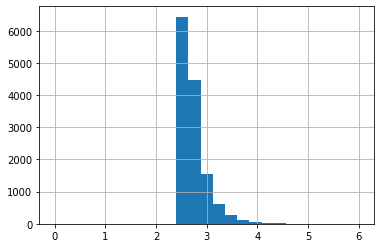

In [66]:
data['ceiling_height'].hist(bins=25,range=(0,6))

Пик гистограммы располагается в 2,5, что похоже на правду. Однако встречаются и странные значения. Давайте разберемся ниже.

In [67]:
data['ceiling_height'].describe()

count    13590.000000
mean         2.769488
std          1.282745
min          1.000000
25%          2.512500
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Максимальное значение составляет 100, что может указывать на наличие выбросов в данных. Взглянем на них подробнее.

In [68]:
data.query('ceiling_height > 20')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqr_meter,weekday,month,year,floor_type,cityCenters_nearest_meters
355,17,3.600,55.2,2018-07-12,2,25.0,5.0,32.0,2,False,...,NaN,0,NaN,259.0,65217.39,3,7,2018,другой,NaN
3148,14,2.900,75.0,2018-11-12,3,32.0,3.0,53.0,2,False,...,NaN,0,NaN,NaN,38666.67,0,11,2018,другой,NaN
4643,0,4.300,45.0,2018-02-01,2,25.0,9.0,30.0,2,False,...,658.0,1,331.0,181.0,95555.56,3,2,2018,другой,13.0
5076,0,3.850,30.5,2018-10-03,1,24.0,5.0,19.5,1,True,...,397.0,1,578.0,7.0,126229.51,2,10,2018,первый,8.0
5246,0,2.500,54.0,2017-10-13,2,27.0,5.0,30.0,3,False,...,NaN,0,NaN,540.0,46296.30,4,10,2017,другой,NaN
5669,4,4.400,50.0,2017-08-08,2,26.0,9.0,21.3,3,False,...,305.0,0,NaN,267.0,88000.00,1,8,2017,другой,11.0
5807,17,8.150,80.0,2019-01-09,2,27.0,36.0,41.0,13,False,...,NaN,3,80.0,38.0,101875.00,2,1,2019,другой,20.0
6246,6,3.300,44.4,2019-03-25,2,25.0,5.0,31.3,5,False,...,417.0,2,73.0,NaN,74324.32,0,3,2019,последний,51.0
9379,5,3.950,42.0,2017-03-26,3,25.0,5.0,30.0,2,False,...,NaN,0,NaN,NaN,94047.62,6,3,2017,другой,14.0
10773,8,3.800,58.0,2017-10-13,2,27.0,10.0,30.1,3,False,...,NaN,0,NaN,71.0,65517.24,4,10,2017,другой,NaN


В столбце ceiling_height указана высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные 
значения: 2.5 м и 3.2 м. Значение 100 просто удалим из датафрейма.

In [69]:
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] != 32, 3.2)
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] != 25, 2.5)
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] != 24, 2.4)
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] != 27, 2.7)
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] != 26, 2.6)
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] != 22.6, 2.26)
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] != 27.5, 2.75)

In [70]:
data = data.query('ceiling_height != 100')

In [71]:
data['ceiling_height'].describe()

count    13589.000000
mean         2.727357
std          0.344218
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         20.000000
Name: ceiling_height, dtype: float64

Высота потолков не может быть менее 2 метров. Посмотрим, сколько таких значений мы найдем.

In [72]:
data.loc[data['ceiling_height'] < 2]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqr_meter,weekday,month,year,floor_type,cityCenters_nearest_meters
5712,5,1.5,42.8,2017-08-14,2,1.20,2.0,27.5,1,False,...,NaN,0,NaN,248.0,35046.73,0,8,2017,первый,NaN
16934,5,4.1,40.0,2017-10-17,1,1.75,37.0,17.4,5,False,...,NaN,3,80.0,71.0,102500.00,1,10,2017,другой,20.0
22590,16,6.0,55.0,2018-10-31,2,1.00,12.0,32.4,7,False,...,293.0,2,289.0,13.0,109090.91,2,10,2018,другой,14.0


Удалим их

In [73]:
data = data.query('not (ceiling_height < 2)')

In [74]:
data['ceiling_height'].describe()

count    13586.000000
mean         2.727668
std          0.343585
min          2.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         20.000000
Name: ceiling_height, dtype: float64

Также смущают квартиры с высотой потолков выше 6 метров.

In [75]:
data.loc[data['ceiling_height'] > 6]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqr_meter,weekday,month,year,floor_type,cityCenters_nearest_meters
3474,3,1.40,30.0,2018-03-16,1,8.0,5.0,15.3,2,False,...,NaN,0,NaN,125.0,46666.67,4,3,2018,другой,NaN
5863,20,5.65,45.0,2018-08-15,1,8.3,16.0,19.3,14,False,...,NaN,1,613.0,14.0,125555.56,2,8,2018,другой,11.0
15061,19,5.60,56.4,2018-05-11,2,14.0,14.0,32.4,5,False,...,NaN,0,NaN,315.0,99290.78,4,5,2018,другой,14.0
15743,14,5.60,67.0,2016-11-11,3,8.0,16.0,41.0,1,False,...,723.0,0,NaN,474.0,83582.09,4,11,2016,первый,11.0
17442,0,5.35,54.0,2015-06-16,2,8.0,5.0,29.0,2,False,...,NaN,0,NaN,469.0,99074.07,1,6,2015,другой,28.0
17496,15,6.70,92.9,2019-02-19,3,20.0,17.0,53.2,14,False,...,967.0,0,NaN,NaN,72120.56,1,2,2019,другой,15.0
22309,20,5.30,45.0,2017-09-30,1,10.3,16.0,15.5,15,False,...,440.0,2,450.0,136.0,117777.78,5,9,2017,другой,12.0


Удалим их.

In [76]:
data = data.query('not (ceiling_height > 6)')

In [77]:
data['ceiling_height'].describe()

count    13579.000000
mean         2.723433
std          0.272235
min          2.000000
25%          2.510000
50%          2.650000
75%          2.800000
max          6.000000
Name: ceiling_height, dtype: float64

Стандартное отклонение свели до минимума. Характеристика данных выглядит более здоровой. 

Построим гистограмму для типа этажа квартиры с помощью метода .hist().

<AxesSubplot:>

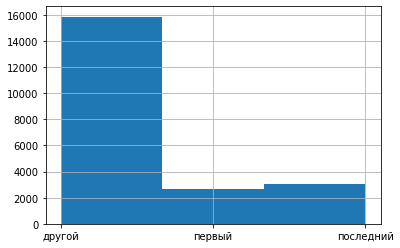

In [78]:
data['floor_type'].hist(bins=3)

Данные выглядят нормально - большинство квартир не находят на певром и последних этажах

Построим гистограмму для общего количества этажей в доме с помощью метода .hist().

<AxesSubplot:>

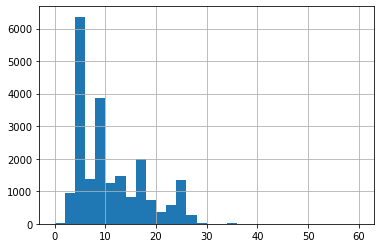

In [79]:
data['floors_total'].hist(bins=30,range=(0,60))

Пик приходится на 5 и 10 этажей. Выглядит правдоподобно. 

In [80]:
data['floors_total'].describe()

count    21490.000000
mean        10.601117
std          6.541280
min          1.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         60.000000
Name: floors_total, dtype: float64

Данные выглядят нормально.

Построим гистограмму для расстояния до центра города в метрах с помощью метода .hist().

<AxesSubplot:>

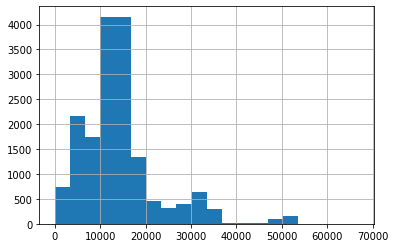

In [81]:
data['cityCenters_nearest'].hist(bins=20,range=(0,67000))

In [82]:
data['cityCenters_nearest'].describe()

count    16722.000000
mean     14267.759957
std       8682.358449
min        181.000000
25%       9360.000000
50%      13117.000000
75%      16280.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

Данные выглядят нормально.

Построим гистограмму для расстояние до ближайшего парка с помощью метода .hist().

<AxesSubplot:>

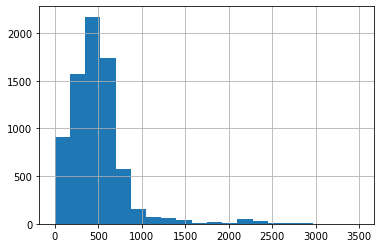

In [83]:
data['parks_nearest'].hist(bins=20,range=(0,3500))

In [84]:
data['parks_nearest'].describe()

count    7432.000000
mean      487.710710
std       337.907137
min         1.000000
25%       287.000000
50%       451.000000
75%       610.000000
max      3190.000000
Name: parks_nearest, dtype: float64

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>В итоге ты отбросил почти 40% от всех данных, а доступимо отбросить не более 10%. Основные столбцы где стоит поработать с выбросами это стоимость квартиры, высота потолков, количество комнат и общая площадь. Остальные можно не трогать. 
    
<br>Также обрати внимание на то, корректно ли ты делаешь срезы и не теряешь ли ты данные с пропусками
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Исправил
<br> 1. Отбросил только 9% данных
<br> 2. Более подробно и обоснованно проработал столбцы с ценой, высотой, комантами и общей площадью
<br> 3. Остальный столбцы не трогал
<br> 4. Проверил срезы и пропуски
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Ещё необходимо написать вывод под каждым графиком
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Исправил - выводы написал
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Отлично! Теперь всё верно)
</div>

<AxesSubplot:>

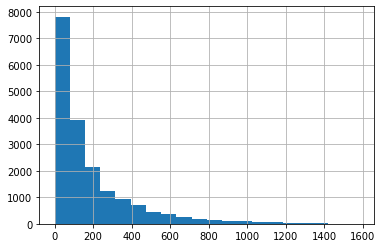

In [85]:
data['days_exposition'].hist(bins=20,range=(0,1580))

In [86]:
data['days_exposition'].describe()

count    18581.000000
mean       185.298100
std        221.272778
min          1.000000
25%         45.000000
50%        102.000000
75%        239.000000
max       1580.000000
Name: days_exposition, dtype: float64

Быстрыми продажами можно считать те, которые завершаются в течение певрого квартиля (25%) времени продажи, то есть менее 45 дней.Продажи, которые занимают более 238 дней (75% всех продаж), могут быть считаться необычно долгими.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Если интересно, то можно посмотреть на диапазон от 0 до 100 дней. Там есть пики, которым можно найти очень логичное объяснение</div>
</div>

<AxesSubplot:>

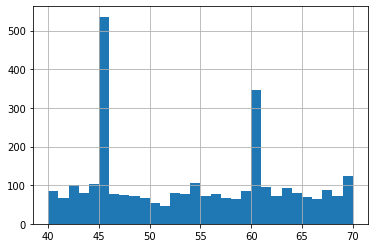

In [87]:
data['days_exposition'].hist(bins=30,range=(40,70))

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Вижу пики в 45-й и 60-й дни, но очень логичного объяснения не пришло в голову. Первая мысль, которая пришла, это зарплата покупателей - 15-ый или 30-ый день, но это не очень вяжется, так как days_exposition учитывает количество дней от выставления до снятия. Возможно, на 45-й и 60-й день, если квартира не продалась, проводятся дополнительные маркетинговые мероприятия или меняется цена, чтобы стимулировать продажи.
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b> 
<br>Близко! На самом деле это особенность функционирования системы размещения объявлений) Убедиться в этом можно по ссылке ниже

	https://yandex.ru/support/realty/owner/home/add-ads-housing.html
</div>

Посчитаем зависимость стоимости от общей площади

In [88]:
price_tarea = data.pivot_table(index='last_price', values='total_area')
price_tarea.reset_index(inplace=True)

<AxesSubplot:xlabel='last_price', ylabel='total_area'>

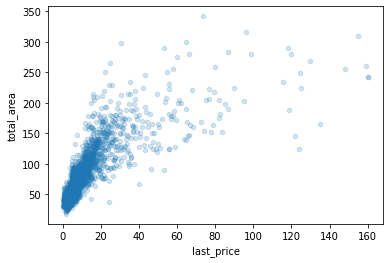

In [89]:
price_tarea.plot(x='last_price', y='total_area',kind='scatter', alpha=0.2)

In [90]:
price_tarea.corr()

,last_price,total_area
last_price,1.000000,0.778435
total_area,0.778435,1.000000


Показатель корреляции 0.778435 указывает на сильную положительную линейную зависимость между стоимостью квартиры и ее общей площадью - чем больше площадь квартиры, тем выше ее стоимость, и наоборот.

Посчитаем зависимость стоимости от общей площади 

In [91]:
price_larea = data.pivot_table(index='last_price',values='living_area')
price_larea.reset_index(inplace=True)

<AxesSubplot:xlabel='last_price', ylabel='living_area'>

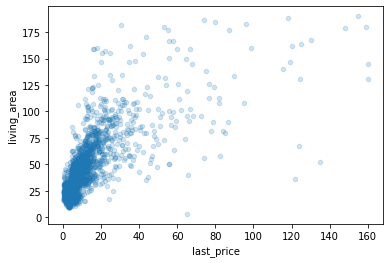

In [92]:
price_larea.plot(x='last_price', y='living_area',kind='scatter', alpha=0.2)

In [93]:
price_larea.corr()

,last_price,living_area
last_price,1.000000,0.718675
living_area,0.718675,1.000000


Показатель корреляции 0.718675 указывает на сильную положительную линейную зависимость между стоимостью квартиры и ее жилой площадью - чем больше жилая площадь квартиры, тем выше ее стоимость, и наоборот.

Посчитаем зависимость стоимости от площади кухни

In [94]:
price_karea = data.pivot_table(index='last_price',values='kitchen_area')
price_karea.reset_index(inplace=True)

<AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>

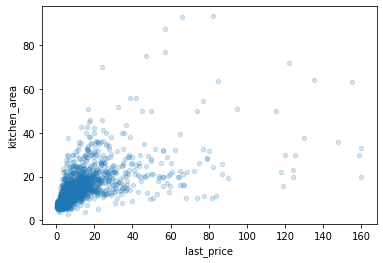

In [95]:
price_karea.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.2)

In [96]:
price_karea.corr()

,last_price,kitchen_area
last_price,1.000000,0.596418
kitchen_area,0.596418,1.000000


Здесь также прослеживается положительная линейная корреляция, однако ее характер можно описать как умеренный, что означает, что при увеличении площади кухни стоимость квартиры также имеет тенденцию к увеличению, и наоборот.

Посчитаем зависимость стоимости от количества комнат

In [97]:
price_rooms = data.pivot_table(index='last_price',values='rooms')
price_rooms.reset_index(inplace=True)

<AxesSubplot:xlabel='last_price', ylabel='rooms'>

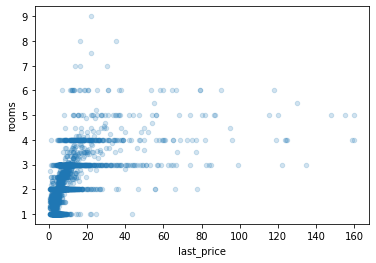

In [98]:
price_rooms.plot(x='last_price', y='rooms', kind='scatter', alpha=0.2)

In [99]:
price_rooms.corr()

,last_price,rooms
last_price,1.000000,0.537122
rooms,0.537122,1.000000


Здесь также прослеживается положительная линейная корреляция, однако ее характер можно описать как умеренный, что означает, что при увеличении количества комнат стоимость квартиры также имеет тенденцию к увеличению, и наоборот.

Посчитаем зависимость стоимости от этажа

In [100]:
price_tfloor = data.pivot_table(index='floor_type', values='last_price', aggfunc='mean')
price_tfloor

,last_price
floor_type,
другой,6.500757
первый,4.752166
последний,6.331924


<AxesSubplot:xlabel='floor_type'>

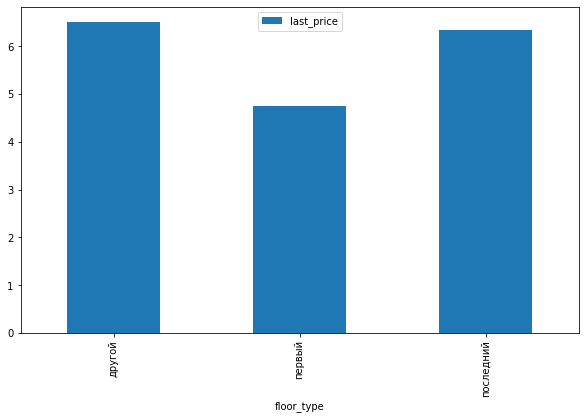

In [101]:
price_tfloor.plot(kind='bar', figsize=(10, 6))

Из графика мы наблюдаем, что самыми дешевыми квартиры являются квартиры на певром этаже - 4 679 219. Следом идут квартиры на последнем этаже - 5 981 392. Самые дорогие квартиры распалагются на этажах между певрым и последним - 6 701 936.

Посчитаем зависимость стоимости от даты размещения

In [102]:
price_date_weekday = data.pivot_table(index='weekday',values='last_price')
price_date_weekday

,last_price
weekday,
0,6.322722
1,6.226170
2,6.135280
3,6.629187
4,6.187086
5,5.894671
6,6.171822


<AxesSubplot:xlabel='weekday'>

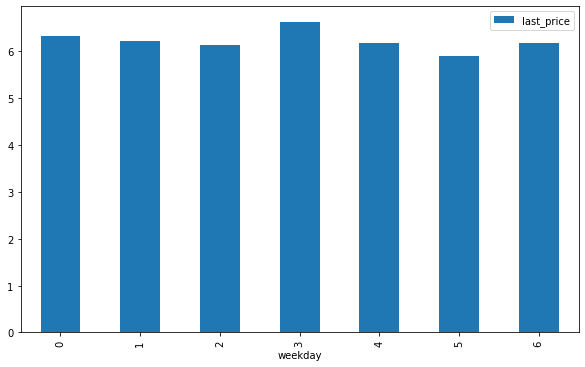

In [103]:
price_date_weekday.plot(kind='bar', figsize=(10, 6))

Из графика мы наблюдаем, что значения цены по дня неделям различаются несильно. Что можно отметить, так это то, что меньшая средння цена хараткерна для субботы, а большая - для четверга. 

In [104]:
price_date_month = data.pivot_table(index='month',values='last_price')
price_date_month

,last_price
month,
1,6.454922
2,6.318954
3,6.046392
4,6.287635
5,6.223292
6,6.188460
7,6.340222
8,6.322404
9,6.299742


<AxesSubplot:xlabel='month'>

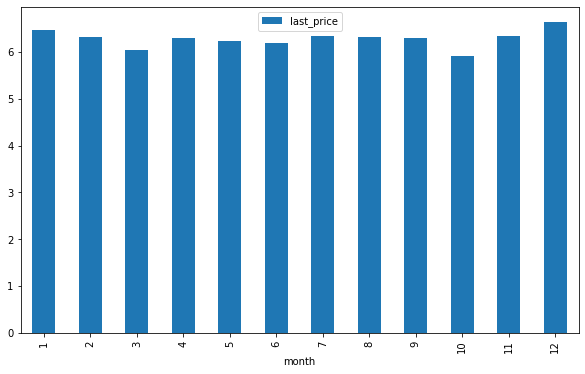

In [105]:
price_date_month.plot(kind='bar', figsize=(10, 6))

Также и для месяцев мы наблюдаем схожую ситуацию - разница невелика. Что можно отметить высокая цена хараткерна для начала и конца года - январь и декабрь.

In [106]:
price_date_year = data.pivot_table(index='year',values='last_price')
price_date_year

,last_price
year,
2014,11.934759
2015,8.037223
2016,6.343977
2017,6.167742
2018,5.883229
2019,6.490498


<AxesSubplot:xlabel='year'>

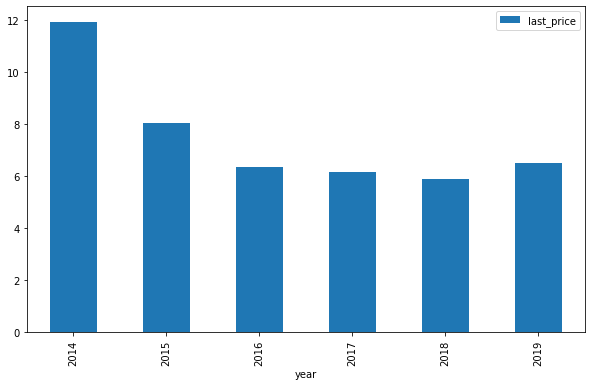

In [107]:
price_date_year.plot(kind='bar', figsize=(10, 6))

Здесь мы можем наблюдать тенденцию на убывание. Самая высокая средняя цена хараткерна для 2014 года потом цена убывает вплоть до 2018, в 2019 заметен небольшой рост.

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Тут необходимо рассчитать по отдельности зависимость для дня недели, месяца и года. Мы ведь для этого создавали отдельные столбцы. Изучить зависимость цены от времени публикации нужно таким же способом как ты изучаешь зависимость цены от категории этажа
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Построил и проанализировал отдельные графики. 
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

In [108]:
top_locality = data['locality_name'].value_counts().head(10) # группируем данные по населённым пунктам и считаем количество объявлений в каждом населённом пункте

In [109]:
selected_data = data.query('locality_name in @top_locality.index') # выбираем только те строки, которые относятся к выбранным населённым пунктам

In [110]:
selected_data['price_sqr_meter'] = round((selected_data['last_price'] / selected_data['total_area']),2) # создаем столбец со средней ценой

/tmp/ipykernel_179/3043934821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['price_sqr_meter'] = round((selected_data['last_price'] / selected_data['total_area']),2) # создаем столбец со средней ценой


In [111]:
pivot_table = selected_data.pivot_table(index='locality_name',values='price_sqr_meter',aggfunc=['mean','count']) # создаем сводную таблицу со средними значениями цены за квадрытный метр по регионам
pivot_table_sorted = pivot_table.sort_values(by=('count', 'price_sqr_meter'), ascending=False)
pivot_table_sorted.columns = ['price_sqr_meter', 'count']
pivot_table_sorted

,price_sqr_meter,count
locality_name,,
Санкт-Петербург,0.113327,14412
Мурино,0.086205,498
поселок Шушары,0.078728,401
Всеволожск,0.069071,366
Пушкин,0.103430,344
Колпино,0.075229,327
поселок Парголово,0.090909,297
Гатчина,0.068836,292
деревня Кудрово,0.092439,246


In [112]:
highest_price = pivot_table_sorted['price_sqr_meter'].idxmax()
print(f"Населенный пункт с самой высокой ценой квадратного метра является {highest_price}")

Населенный пункт с самой высокой ценой квадратного метра является Санкт-Петербург


In [113]:
lowest_price = pivot_table_sorted['price_sqr_meter'].idxmin()
print(f"Населенный пункт с самой низкой ценой квадратного метра является {lowest_price}")

Населенный пункт с самой низкой ценой квадратного метра является Гатчина


<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>По заданию тут нужно построить сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов.
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Сделано. 
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

Выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра. Найдем, как стоимость объектов зависит от расстояния до центра города — построим график изменения средней цены для каждого километра от центра Петербурга.

In [114]:
spb_flats = data.query('locality_name == "Санкт-Петербург"')

In [115]:
price_per_km = spb_flats.pivot_table(index='cityCenters_nearest_meters', values='price_sqr_meter', aggfunc='mean')
price_per_km.reset_index(inplace=True)
price_per_km

,cityCenters_nearest_meters,price_sqr_meter
0,0.0,250756.186667
1,1.0,155549.156474
2,2.0,157217.274669
3,3.0,119787.259043
4,4.0,128951.753908
5,5.0,135486.555324
6,6.0,146841.768634
7,7.0,153961.753055
8,8.0,123475.263916
9,9.0,113040.003578


<AxesSubplot:xlabel='cityCenters_nearest_meters', ylabel='price_sqr_meter'>

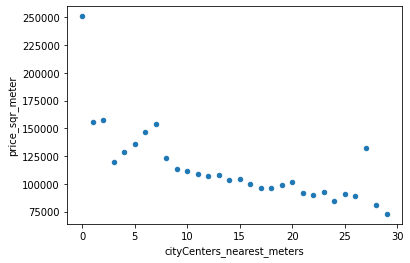

In [116]:
price_per_km.plot(x='cityCenters_nearest_meters', y='price_sqr_meter', kind='scatter', alpha=1)

In [117]:
price_per_km.corr()

,cityCenters_nearest_meters,price_sqr_meter
cityCenters_nearest_meters,1.000000,-0.742348
price_sqr_meter,-0.742348,1.000000


Здесь мы можем наблюдать сильную отрицательную линейная корреляция, что означает, что при увеличении расстояния до центра стоимость квартиры уменьшается, и наоборот.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Верно 👍
</div>

### Напишите общий вывод

Целью исследования было проведение исследовательского нализа данных, который поможет установить параметры, влияющие на цену объектов

В качестве вводной информации в нашем распоряжении были данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Перед тем, как перейти непосредственно к анализу данных и ответам на поставленные заказчиком вопросы, было необходимо подготовить данные к дальнейшей работе. В рамках предобработки данных были выполнены следующие шаги:

- Импортирована библиотека pandas, и данные были считаны из предложенного датафрейма.
- Изучена и проверена основная информация о датафрейме: количество строк и столбцов, типы данных и наличие пропущенных значений. В рамках ознакомления были построены гистограммы для всех столбцов датафрейма
- Затем была обработка пропусков в столбцах 'is_apartment', 'balcony', 'parks_around3000', 'ponds_around3000' с помощью цикла и метода fillna(). Пропуски в остальных столбцах, к сожалению, не были обработанны по причине неполноты данных.
- С помощью метода .sum() мы убедились, что в датафрейме больше нет пропусков.
- Затем для более удобной работы мы изменили тип данных в столбце 'first_day_exposition' с object на datetime64 с помощью метода .to_datetime().
- is_apartment с object на bool с помощью метода .astype()
- Значения в столбцах 'balcony', 'parks_around3000', 'ponds_around3000' мы поменяли с float64 на int64
 - Далее мы перешли к работе с неявными дубликатами, которые обнаружили с помощью метода .unique() и .nunique() и устранили с помощью метода .replace()
 - Далее мы добавили следующие столбцы
     - цена одного квадратного метра;
    - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
    - месяц публикации объявления;
    - год публикации объявления;
    - тип этажа квартиры («первый», «последний», «другой»);
    - расстояние до центра города в километрах.
 
После того, как данные были готовы, мы перешли к исследовательскому анализу данных. 

Мы построили гистограмму для столбца с общей площадью квартир. При построении гистограммы выделяются несколько значений выше 250 квадратных метров. Эти значения являются подозрительными, так как являются довольно большими для одной квартиры. У этих квартир подозрительным выглядит разница между общей площядью и жилой площядью. Например, 900 общих квадратных метров и 410 жилых. Некоторые из этих квартир находятся на последнем этаже, то есть можно предположить, что там есть терасса. Однако, это все еще кажется подозрительным, поэтому мы удалили данные квартиры из датафрейма. Квартиры площадью больше 400 квадртных метров можно объяснить на первом этаже и последнем. В первом случае может идти речь о комерческих помещениях, а во втором о пентхаусах. Однако слонжо объяснить квартиры с такой площадью на других этажах. Есть подозрение, что эти значения являются вбросом, поэтому удалим их тоже. После этот мы построили гистограмму еще раз и среднее значение и медиана стали близки друг к другу, что может указывать на отсутствие значительных выбросов.

Далее мы построили гистограмму для столбца с жилой площадью квартир. Медиана и 25-й квартиль близки друг к другу, что указывает на то, что большинство данных сосредоточены в этом диапазоне. 75% данных находятся ниже 42 квадратных метров, это видно и на гистограмме. Обработав значения в столбце общей площади мы устранили выбросы и для площади жилой. Поэтому здесь оставим все, как есть без изменений.

Далее мы построили гистограмму для столбца с площадью кухни. Разброс данных относительно среднего значения не слишком велик, что указывает на то, что значения переменной распределены достаточно компактно вокруг среднего. Присутсвтуют и большие значения. Однако их мы описали еще в столбце с общей площадью - эти данные можно оставить без изменений.

Далее мы построили гистограмму для столбца с ценой. Средняя цена недвижимости составляет примерно 6.54 миллионов. Медиана - 4.65 миллиона. Стандартное отклонение - 10.89 миллионов - указывает на большой разброс цен. 75% наблюдений имеют цену, меньшую или равную 6,8 миллионов. Все указыавет на большой разброс цен, что нормально для рынка недвижимости, где представленны разные варинты объектов. Однако сильно выделяющиеся и подозрительные значения мы все-таки удалили из датафрейма. 

Далее мы построили гистограмму для столбца с количеством комнат. Вызыают подозрение квавртиры с 0 комнат. Такого быть не может. Вероятнее всего продавец забыл обозначить количество комнат в квартире - мы удалили строки содержащие значение 0 комнат. Также в квартирах, чья жилая площадь меньше 200 квадртных метров, вряд ли сможет быть 10 и больше комнат. Удалим эти строчки из датафрейма.

Далее мы построили гистограмму для столбца с высотой квартир, где нашли и исправили несколько ошибок. Скорее всего они были связаны с опечатками людей, которые заполняли форму - рекомендация для заказчика поставить максмальное значение для высоты потолка.

Далее мы построили гистограмму для столбцов с типом этажа квартиры, общим количеством этажей, близостью к центру и ближлежащим паркам, где не нашли отклонений.

Далее мы построили гистограмму со сроком продажи квартиры. Можно утверждать, что быстрыми продажами можно считать те, которые завершаются в течение певрого квартиля (25%) времени продажи, то есть менее 45 дней.Продажи, которые занимают более 238 дней (75% всех продаж), могут быть считаться необычно долгими.

В последней части исследования мы сосредоточились непосредственно на зависимости стоимости от разных параметров и установить параметры, влияющие на цену объектов. Мы пришли к следующим гипотезам: 

- стоимость/общая площадь (сильная положительная линейная зависимость) - чем больше площадь квартиры, тем выше ее стоимость, и наоборот.
- стоимость/жилая площадь (сильная положительная линейная зависимость) - чем больше площадь квартиры, тем выше ее стоимость, и наоборот.
- стоимость/площадь кухни (умеренная положительная линейная зависимость) - при увеличении площади кухни стоимость квартиры также имеет тенденцию к увеличению, и наоборот.
- стоимость/количество комнат (умеренная положительная линейная зависимость) - при увеличении количества комнат стоимость квартиры также имеет тенденцию к увеличению, и наоборот.
- самыми дешевыми квартиры являются квартиры на певром этаже - 4 679 219. Следом идут квартиры на последнем этаже - 5 981 392. Самые дорогие квартиры распалагются на этажах между певрым и последним - 6 701 936.
- день недели и месяц размещения и стоимость никак не кореллируются, встречаюися лишь небольшие различия, а вот год имеет значения - самая высокая средняя цена хараткерна для 2014 года потом цена убывает вплоть до 2018, в 2019 заметен небольшой рост.
- населенный пункт с самой высокой ценой квадратного метра является Санкт-Петербург
- населенный пункт с самой низкой ценой квадратного метра является Выборг
- отдельно для квартир в Санкт-Петербурге мы видим отрицальную линейную корреляцию, когда ищем зависимость стоимость от дальности от центра - при увеличении расстояния до центра стоимость квартиры уменьшается, и наоборот.

На основе полученных данных мы можем выдвинуть следующую гипотезу 
- на увеличение цены влияет площадь квартиры (чем больше площадь, тем выше цены)
- этаж (самые дорогие квартиры между первым и последним)
- регион - самые дорогие квартиры в крупных гордах, например, Санкт-Петербург
- дальность от центра - с ее уменьшением, цены увеличивается

Исходя из наших предположений, мы рекомендуем заказчику более тщательно собирать и анализировать данные клиентов, чтобы избежать ошибочных значений или пропусков. Для уточнения гипотез можно внедрить новые параметры, такие как возраст жилья, степень ремонта и другие. Выдвинутые выше предположения могут стать основой для разработки автоматизированной системы, которая будет отслеживать аномалии и мошенническую деятельность, сопоставляя их с автоматически сгенерированной рыночной стоимостью объектов недвижимости.

<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v1:</b> 
<br>Необходимо поправить:
<br>- поправить границы для аномальных значений 
<br>- добавить выводы по каждому графику в шаге 4.1
<br>- корректно изучить зависимость цены от времени публикации объявления
<br>- корректно изучить топ10 населённых пунктов с наибольшим числом объявлений

<br>После всех внесённых правок не забудь поправить выводы там, где это необходимо
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>- поправить границы для аномальных значений - сделано
<br>- добавить выводы по каждому графику в шаге 4.1 - сделано
<br>- корректно изучить зависимость цены от времени публикации объявления - сделано
<br>- корректно изучить топ10 населённых пунктов с наибольшим числом объявлений - сделано

<br>После всех внесённых правок не забудь поправить выводы там, где это необходимо - сделано
</div>

<div class="alert alert-success">
<b>✔️ Итоговый комментарий ревьюера v2:</b>
<br>Все правки выполнены. Молодец!
<br>Я рад был поработать над проверкой твоей работы) В качестве дополнительного материала для изучения могу порекомендовать следующий ресурс:

	https://www.python-graph-gallery.com/
<br>В нем содержится большая библиотека графиков с готовым кодом, который можно использовать при работе.
<br>Поздравляю со сдачей проекта и желаю удачи в дальнейшем обучении! 😉    
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.